<a href="https://colab.research.google.com/github/Rido843/Basic-Python-Programming-for-Data-Science/blob/main/SEC_Presentasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [ ]:
data=pd.read_csv('/content/Datafix2.csv',sep=';')
data

,NO,Provinsi,Indeks Ketersediaan (IK),Indeks Keterjangkauan (IA),Indeks Pemanfaatan (IP),Luas Wilayah
0,1,Aceh,80.43,70.17,62.29,317869.41
1,2,Sumatera Utara,81.59,73.90,65.55,388591.22
2,3,Sumatera Barat,86.11,83.39,71.12,295664.47
3,4,Riau,29.16,84.06,69.52,64733.13
4,5,Jambi,57.88,82.61,67.42,84772.93
5,6,Sumatera Selatan,80.87,75.61,58.30,551320.76
6,7,Bengkulu,81.45,74.54,59.82,64137.28
7,8,Lampung,94.35,79.20,65.38,545149.05
8,9,Kep. Bangka Belitung,32.82,92.25,78.67,17840.55
9,10,Kepulauan Riau,0.00,88.16,73.00,298.52


In [ ]:
df_prov = data['Provinsi']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NO                          34 non-null     int64  
 1   Provinsi                    34 non-null     object 
 2   Indeks Ketersediaan (IK)    34 non-null     float64
 3   Indeks Keterjangkauan (IA)  34 non-null     float64
 4   Indeks Pemanfaatan (IP)     34 non-null     float64
 5   Luas Wilayah                34 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
data.describe()

,NO,Indeks Ketersediaan (IK),Indeks Keterjangkauan (IA),Indeks Pemanfaatan (IP),Luas Wilayah
count,34.000000,34.000000,34.000000,34.000000,3.400000e+01
mean,17.500000,67.357353,79.556765,67.821176,3.134493e+05
std,9.958246,28.282912,9.793314,8.535054,4.741006e+05
min,1.000000,0.000000,49.490000,42.290000,2.985200e+02
25%,9.250000,51.655000,76.142500,62.305000,5.500260e+04
50%,17.500000,80.370000,82.080000,68.545000,1.221226e+05
75%,25.750000,85.897500,84.410000,72.902500,3.123182e+05
max,34.000000,96.060000,93.180000,82.710000,1.754380e+06


In [ ]:
data.isnull().sum()

NO                            0
Provinsi                      0
Indeks Ketersediaan (IK)      0
Indeks Keterjangkauan (IA)    0
Indeks Pemanfaatan (IP)       0
Luas Wilayah                  0
dtype: int64

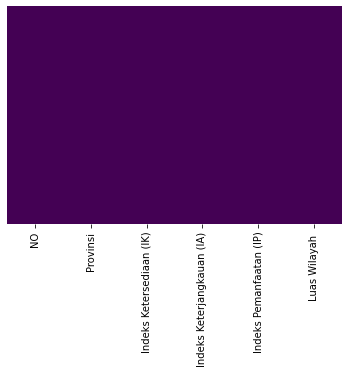

In [ ]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [ ]:
data['Provinsi'].value_counts()

Maluku Utara            1
Kalimantan Tengah       1
DKI Jakarta             1
Papua Barat             1
Jawa Tengah             1
Sulawesi Selatan        1
Aceh                    1
Bali                    1
Kalimantan Utara        1
Nusa Tenggara Timur     1
Sumatera Selatan        1
Banten                  1
Papua                   1
Riau                    1
Jambi                   1
Sulawesi Tenggara       1
DIY                     1
Kalimantan Selatan      1
Kepulauan Riau          1
Jawa Barat              1
Sulawesi Tengah         1
Bengkulu                1
Sulawesi Utara          1
Sumatera Utara          1
Maluku                  1
Lampung                 1
Sulawesi Barat          1
Jawa Timur              1
Nusa Tenggara Barat     1
Kep. Bangka Belitung    1
Kalimantan Timur        1
Gorontolo               1
Sumatera Barat          1
Kalimantan Barat        1
Name: Provinsi, dtype: int64

In [ ]:
datafix=data.drop(['Provinsi','NO'],axis=1)
datafix

,Indeks Ketersediaan (IK),Indeks Keterjangkauan (IA),Indeks Pemanfaatan (IP),Luas Wilayah
0,80.43,70.17,62.29,317869.41
1,81.59,73.90,65.55,388591.22
2,86.11,83.39,71.12,295664.47
3,29.16,84.06,69.52,64733.13
4,57.88,82.61,67.42,84772.93
5,80.87,75.61,58.30,551320.76
6,81.45,74.54,59.82,64137.28
7,94.35,79.20,65.38,545149.05
8,32.82,92.25,78.67,17840.55
9,0.00,88.16,73.00,298.52


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(np.array(datafix))

data_normalized = scaler.transform(datafix)

print('mean: ', data_normalized.mean(axis = 0).round(2))
print('std: ', data_normalized.std(axis = 0).round(2))

mean:  [ 0.  0. -0. -0.]
std:  [1. 1. 1. 1.]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
X = data_normalized
X

array([[ 0.469161  , -0.97290124, -0.6577998 ,  0.00946343],
       [ 0.51079195, -0.58630141, -0.27010157,  0.1608772 ],
       [ 0.67300911,  0.39729976,  0.39231536, -0.03807683],
       [-1.37085535,  0.46674262,  0.20203401, -0.53249553],
       [-0.34013037,  0.31645583, -0.04771025, -0.48959078],
       [ 0.48495205, -0.40906664, -1.1323139 ,  0.50927742],
       [ 0.50576752, -0.51996793, -0.95154662, -0.53377124],
       [ 0.96873243, -0.03697726, -0.29031896,  0.49606393],
       [-1.23950251,  1.31560391,  1.29020544, -0.63289147],
       [-2.41737137,  0.8916915 ,  0.61589593, -0.67044856],
       [-2.41737137,  0.47192493,  1.40080647, -0.66912974],
       [ 0.61953487,  0.04593959,  0.42085756,  2.72640446],
       [ 0.79215977,  0.24183066,  1.2913947 ,  2.89777439],
       [ 0.50181976,  0.14129398,  1.44956606, -0.43440669],
       [ 0.83199628,  0.10190847,  0.68487292,  3.08500028],
       [ 0.40779123,  0.40248206, -0.50319621,  0.02544332],
       [ 0.32417044,  1.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


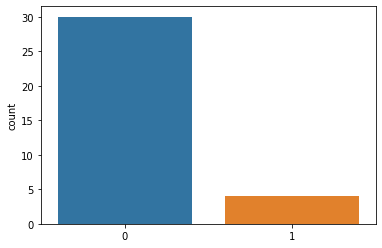

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
label_kmeans  = kmeans.labels_
sns.countplot(label_kmeans)

In [ ]:
from collections import Counter
label_name=Counter(label_kmeans).keys() 
label_count=Counter(label_kmeans).values() 

print(label_name)
print(label_count)

dict_keys([0, 1])
dict_values([30, 4])


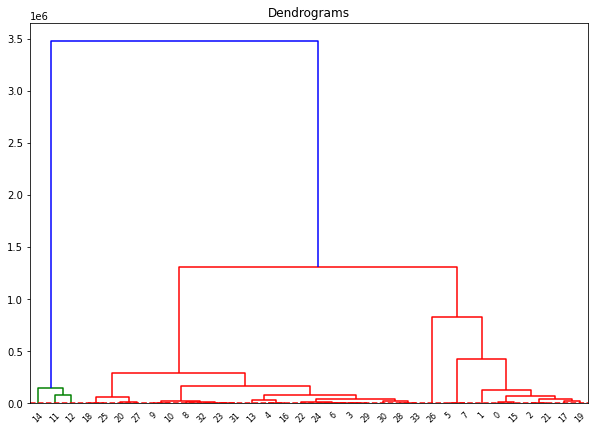

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(datafix, method='ward'))
plt.axhline(y=1.3, color='r', linestyle='--')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


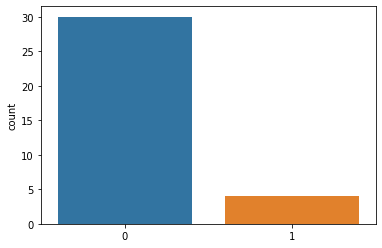

In [ ]:
cluster_hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
label_hc = cluster_hc.fit_predict(X)
sns.countplot(label_hc)

In [ ]:
dbscan = DBSCAN(eps=0.25, min_samples=2).fit(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


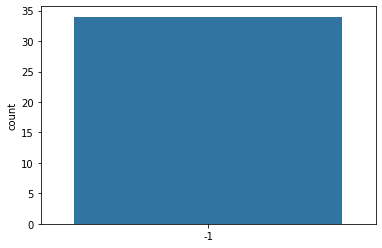

In [ ]:
label_dbscan=dbscan.labels_
sns.countplot(label_dbscan)

In [ ]:
label_name=Counter(label_dbscan).keys() 
label_count=Counter(label_dbscan).values() 

print(label_name)
print(label_count)

dict_keys([-1])
dict_values([34])


In [ ]:
DBI_kmeans=metrics.davies_bouldin_score(X, label_kmeans)
DBI_kmeans

0.8764555817217514

In [ ]:
SS_kmeans=metrics.silhouette_score(X, label_kmeans, metric='euclidean', sample_size=None, random_state=None)
SS_kmeans

0.40187394910139357

In [ ]:
DBI_hc=metrics.davies_bouldin_score(X, label_hc)
DBI_hc

0.8764555817217514

In [ ]:
SS_hc=metrics.silhouette_score(X, label_hc, metric='euclidean', sample_size=None, random_state=None)
SS_hc

0.40187394910139357

In [ ]:
dict_cluster_model = {'Clustering Method':['K Means', 'Hierarchical'],
                      'Silhouette Score':[SS_kmeans, SS_hc],
                      'DBI':[DBI_kmeans, DBI_hc]}

df_cluster_model = pd.DataFrame(dict_cluster_model)

df_cluster_model

,Clustering Method,Silhouette Score,DBI
0,K Means,0.401874,0.876456
1,Hierarchical,0.401874,0.876456


In [ ]:
datafix['Cluster Label']=label_hc

datafix

,Indeks Ketersediaan (IK),Indeks Keterjangkauan (IA),Indeks Pemanfaatan (IP),Luas Wilayah,Cluster Label
0,80.43,70.17,62.29,317869.41,0
1,81.59,73.90,65.55,388591.22,0
2,86.11,83.39,71.12,295664.47,0
3,29.16,84.06,69.52,64733.13,0
4,57.88,82.61,67.42,84772.93,0
5,80.87,75.61,58.30,551320.76,0
6,81.45,74.54,59.82,64137.28,0
7,94.35,79.20,65.38,545149.05,0
8,32.82,92.25,78.67,17840.55,0
9,0.00,88.16,73.00,298.52,0


In [ ]:
datafix['Provinsi']= df_prov
datafix

,Indeks Ketersediaan (IK),Indeks Keterjangkauan (IA),Indeks Pemanfaatan (IP),Luas Wilayah,Cluster Label,Provinsi
0,80.43,70.17,62.29,317869.41,0,Aceh
1,81.59,73.90,65.55,388591.22,0,Sumatera Utara
2,86.11,83.39,71.12,295664.47,0,Sumatera Barat
3,29.16,84.06,69.52,64733.13,0,Riau
4,57.88,82.61,67.42,84772.93,0,Jambi
5,80.87,75.61,58.30,551320.76,0,Sumatera Selatan
6,81.45,74.54,59.82,64137.28,0,Bengkulu
7,94.35,79.20,65.38,545149.05,0,Lampung
8,32.82,92.25,78.67,17840.55,0,Kep. Bangka Belitung
9,0.00,88.16,73.00,298.52,0,Kepulauan Riau


In [ ]:
# plt.plot(datafix['NO'],datafix['Indeks Ketersediaan (IK)'])
# plt.xlabel('Provinsi')
# plt.ylabel('Jumlah Indeks Ketersediaan')

In [ ]:
cluster = datafix.groupby(datafix['Cluster Label']).agg({'Indeks Ketersediaan (IK)':np.mean, 
                                                                 'Indeks Keterjangkauan (IA)':np.mean,
                                                                 'Indeks Pemanfaatan (IP)':np.mean,
                                                                 'Luas Wilayah ':np.mean}).reset_index()
cluster

,Cluster Label,Indeks Ketersediaan (IK),Indeks Keterjangkauan (IA),Indeks Pemanfaatan (IP),Luas Wilayah
0,0,70.735,82.465333,69.557667,346220.598667
1,1,42.025,57.742500,54.797500,67664.250000


[0 1]


Text(0.5, 0.98, 'Barplot for Each Cluster')

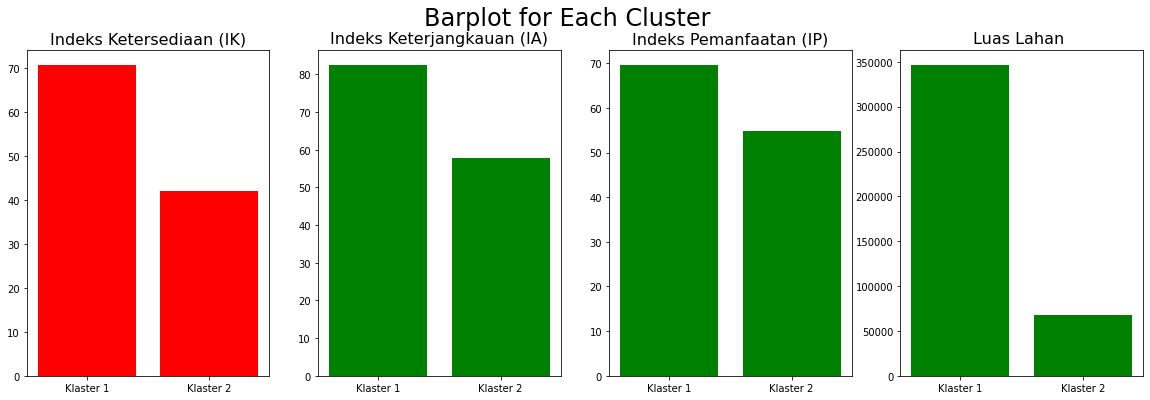

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

labels = cluster['Cluster Label']
IK = cluster['Indeks Ketersediaan (IK)']
IA  = cluster['Indeks Keterjangkauan (IA)']
IP  = cluster['Indeks Pemanfaatan (IP)']
LW  = cluster['Luas Wilayah ']

x = np.arange(len(labels))  # the label locations
print(x)
width = 0.35  # the width of the bars

axs[0].bar(x , IK, label='Indeks Ketersediaan (IK)', color='red')
axs[0].set_title('Indeks Ketersediaan (IK)', fontsize=16)
axs[1].bar(x , IA, label='Indeks Keterjangkauan (IA)', color='green')
axs[1].set_title('Indeks Keterjangkauan (IA)', fontsize=16)
axs[2].bar(x , IP, label='Indeks Pemanfaatan (IP)', color='green')
axs[2].set_title('Indeks Pemanfaatan (IP)', fontsize=16)
axs[3].bar(x , LW, label='Luas Wilayah ', color='green')
axs[3].set_title('Luas Lahan ', fontsize=16)


for ax in axs.flat:
    ax.set(xticks=x,
           xticklabels=['Klaster 1', 'Klaster 2'])

fig.suptitle('Barplot for Each Cluster', fontsize=24)

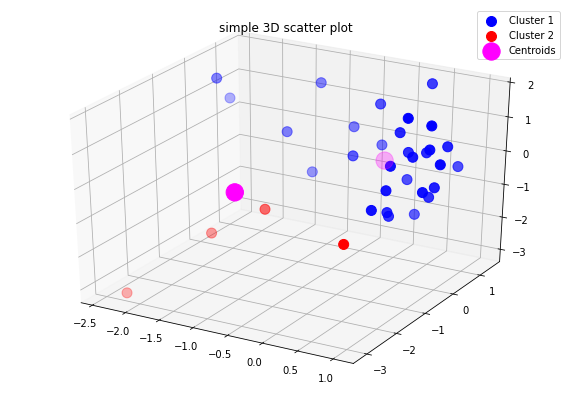

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Visualisasi hasil clusters
ax.scatter3D(X[y_kmeans == 0, 0],X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 100, c = 'blue', label = 'Cluster 1')
ax.scatter3D(X[y_kmeans == 1, 0],X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 100, c = 'red', label = 'Cluster 2')
ax.scatter3D(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'magenta', label = 'Centroids')

ax.legend()


plt.title("simple 3D scatter plot")
 
# show plot
plt.show()